# Pokémon Data Classification: Logistic Regression vs MLP

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [3]:
import pandas as pd
import numpy as np

# Load the Pokémon dataset
file_path = 'pokemon.csv'  # Ensure this file is in the same directory as the notebook
pokemon_data = pd.read_csv(file_path)

# Display the first few rows
pokemon_data.head()

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

In [14]:
# Create a derived feature: attack_to_defense_ratio
pokemon_data['attack_to_defense_ratio'] = pokemon_data['attack'] / pokemon_data['defense']

# Select features and target
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs',
            'capture_rt', 'attack_to_defense_ratio', 'type']
target = 'legendary'
X = pokemon_data[features]
y = pokemon_data[target]

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler


### 2.2 Example for Scaling

### MinMaxScaler Example 

In [20]:
X.head(5)

,attack,defense,sp_attack,sp_defense,speed,total_bs,capture_rt,attack_to_defense_ratio,type
0,49,49,65,65,45,318,45,1.000000,grass
1,62,63,80,80,60,405,45,0.984127,grass
2,100,123,122,120,80,625,45,0.813008,grass
3,52,43,60,50,65,309,45,1.209302,fire
4,64,58,80,65,80,405,45,1.103448,fire


In [24]:
# Min-Max Scaling
# Select features and target
features_digit = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs',
            'capture_rt']
target = 'legendary'
X_example = pokemon_data[features_digit]
y_target = pokemon_data[target]

min_max_scaler = MinMaxScaler()
X_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_example), columns=features_digit)
print("Min-Max Scaled Data:")
print(X_min_max_scaled.head(5))

Min-Max Scaled Data:
     attack   defense  sp_attack  sp_defense     speed  total_bs  capture_rt
0  0.244444  0.195556   0.298913    0.214286  0.228571  0.230000    0.166667
1  0.316667  0.257778   0.380435    0.285714  0.314286  0.375000    0.166667
2  0.527778  0.524444   0.608696    0.476190  0.428571  0.741667    0.166667
3  0.261111  0.168889   0.271739    0.142857  0.342857  0.215000    0.166667
4  0.327778  0.235556   0.380435    0.214286  0.428571  0.375000    0.166667


### Normalizer Example

In [27]:
# Normalization with L1 Norm
l1_normalizer = Normalizer(norm='l1')
X_l1 = l1_normalizer.fit_transform(X_example)
X_normalized_l1 = pd.DataFrame(X_l1, columns=features_digit)
print("\nL1 Normalized Data:\n")
print(X_normalized_l1.head(5))



L1 Normalized Data:

     attack   defense  sp_attack  sp_defense     speed  total_bs  capture_rt
0  0.077044  0.077044   0.102201    0.102201  0.070755  0.500000    0.070755
1  0.077987  0.079245   0.100629    0.100629  0.075472  0.509434    0.056604
2  0.082305  0.101235   0.100412    0.098765  0.065844  0.514403    0.037037
3  0.083333  0.068910   0.096154    0.080128  0.104167  0.495192    0.072115
4  0.080301  0.072773   0.100376    0.081556  0.100376  0.508156    0.056462


In [29]:
# Normalization with L2 Norm
l2_normalizer = Normalizer(norm='l2')
X_l2 = l2_normalizer.fit_transform(X_example)
X_normalized_l2 = pd.DataFrame(X_l2, columns=features_digit)
print("\nL2 Normalized Data:\n")
print(X_normalized_l2.head(5))


L2 Normalized Data:

     attack   defense  sp_attack  sp_defense     speed  total_bs  capture_rt
0  0.142388  0.142388   0.188882    0.188882  0.130764  0.924067    0.130764
1  0.142139  0.144432   0.183406    0.183406  0.137554  0.928491    0.103166
2  0.148501  0.182656   0.181171    0.178201  0.118801  0.928131    0.066825
3  0.155114  0.128267   0.178978    0.149148  0.193893  0.921735    0.134233
4  0.146620  0.132874   0.183275    0.148911  0.183275  0.927828    0.103092


### MaxAbsScaler(Maximum Absolute scaler) Example

In [32]:
# Maximum Absolute Scaling
max_abs_scaler = MaxAbsScaler()
X_max_abs_scaled = pd.DataFrame(max_abs_scaler.fit_transform(X_example), columns=features_digit)
print("\nMax-Abs Scaled Data:")
print(X_max_abs_scaled.head(5))


Max-Abs Scaled Data:
     attack   defense  sp_attack  sp_defense     speed  total_bs  capture_rt
0  0.264865  0.213043   0.335052    0.282609  0.250000  0.407692    0.176471
1  0.335135  0.273913   0.412371    0.347826  0.333333  0.519231    0.176471
2  0.540541  0.534783   0.628866    0.521739  0.444444  0.801282    0.176471
3  0.281081  0.186957   0.309278    0.217391  0.361111  0.396154    0.176471
4  0.345946  0.252174   0.412371    0.282609  0.444444  0.519231    0.176471


### StandardScaler Example

In [35]:
# StandardScaler
scaler = StandardScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X_example)  # Standardize the features

# Step 4: Convert the scaled features back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features_digit)

# Display the scaled data
print("Standardized Features (Mean = 0, Std = 1):")
print(X_scaled_df.head(5))

Standardized Features (Mean = 0, Std = 1):
     attack   defense  sp_attack  sp_defense     speed  total_bs  capture_rt
0 -0.897909 -0.780773  -0.195025   -0.211338 -0.732587 -0.926533   -0.709405
1 -0.493413 -0.325488   0.268888    0.326064 -0.213875 -0.196233   -0.709405
2  0.688960  1.625735   1.567846    1.759138  0.477742  1.650503   -0.709405
3 -0.804564 -0.975896  -0.349663   -0.748740 -0.040970 -1.002081   -0.709405
4 -0.431183 -0.488090   0.268888   -0.211338  0.477742 -0.196233   -0.709405


### 2.3 Data Transformation Using ColumnTransformer

In [40]:
# Categorical and numerical columns
categorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
numeric_transformer =  MaxAbsScaler()# Please try to use max_abs_scaler
categorical_transformer = OneHotEncoder()

# **ColumnTransformer**:
# This handles preprocessing for both numerical and categorical features in a single step.
# - Numerical data is scaled using `StandardScaler` to normalize values.
# - Categorical data (like 'type') is converted into numerical format using one-hot encoding.
# Benefits:
# - Enables seamless integration of preprocessing into a single pipeline.
# - Prevents data leakage by applying transformations only on training data during cross-validation.


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [42]:
preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt', 'attack_to_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [48]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)

# Result:
# - X_train, y_train: Training set (70% of the data)
# - X_temp, y_temp: Temporary set (30% of the data)

# Step 2: Second split to create validation and test sets from the temporary set
# test_size=0.5: Splits the remaining 30% of the data equally into validation (15%) and test (15%) sets
# random_state=42: Ensures reproducibility
# stratify=y_temp: Maintains the class distribution in the split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## Step 3: Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=300, random_state=42)
logistic_model.fit(X_train, y_train)

y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)

y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)  # Use predicted labels here




print("Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


## Step 4: Multi-Layer Perceptron (MLP)

In [66]:
from sklearn.neural_network import MLPClassifier

# Train MLP Classifier
# mlp_model = MLPClassifier(hidden_layer_sizes=(3, 2), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(3, 2), activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate MLP Classifier
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9777
Validation accuracy: 0.9750


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(
    max_iter=1,  # Run one iteration at a time
    solver='saga',  # The saga solver supports recording loss values during optimization
    random_state=42,
    warm_start=True  # Continue training from the last state, which allow manually record the loss at each iteration
)

# To store the loss values
loss_curve = []

# Train the model incrementally
for i in range(1, 301):  # 300 iterations
    logistic_model.fit(X_train, y_train)  # Fit one iteration
    # Predict probabilities to calculate log loss
    y_train_prob = logistic_model.predict_proba(X_train)
    # Calculate the log loss and append to the loss curve
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)


C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

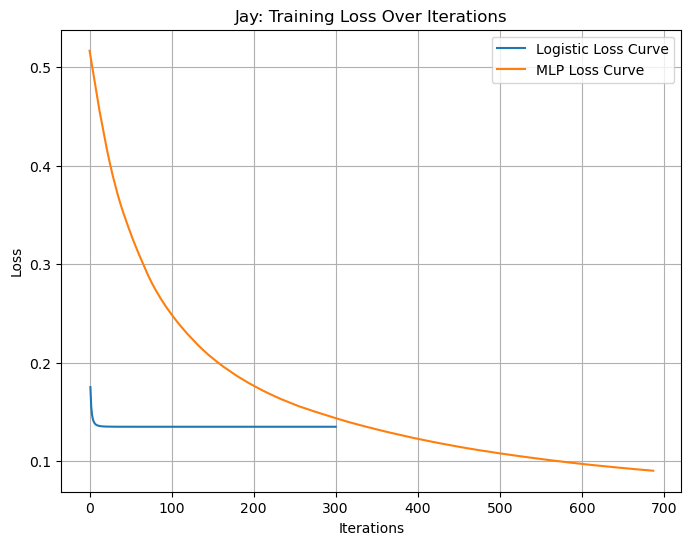

In [78]:
# Extract loss during MLP training
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss, label="Logistic Loss Curve")
plt.plot(mlp_model_loss_curve, label="MLP Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
yourname = "Jay"
plt.title(yourname+": Training Loss Over Iterations")
plt.grid()
plt.legend()
plt.show()

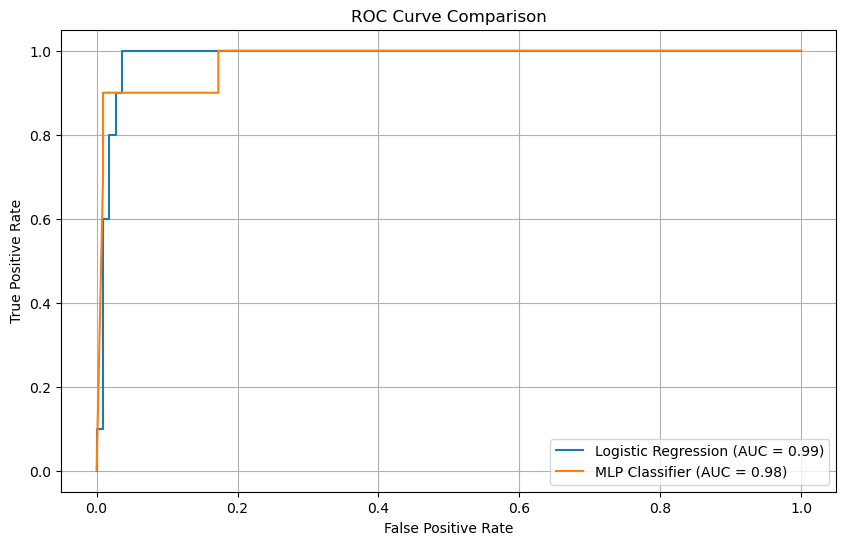

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Conclusion
- Logistic Regression is a simpler model but might perform comparably on well-processed datasets.
- MLP leverages neural network architecture, potentially achieving better results for complex data.
- AUC-ROC curves are helpful for comparing models' classification performance at different thresholds.

## Step 6: Visualization of Predictions and Loss

### 6.1 Actual vs Predicted Results

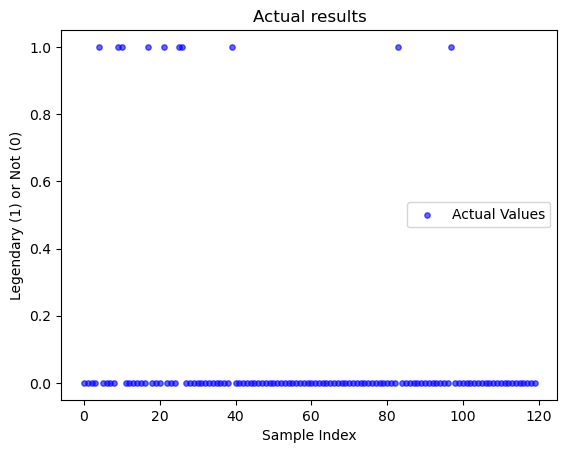

In [87]:
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.6, label="Actual Values", s=15)
plt.title("Actual results")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

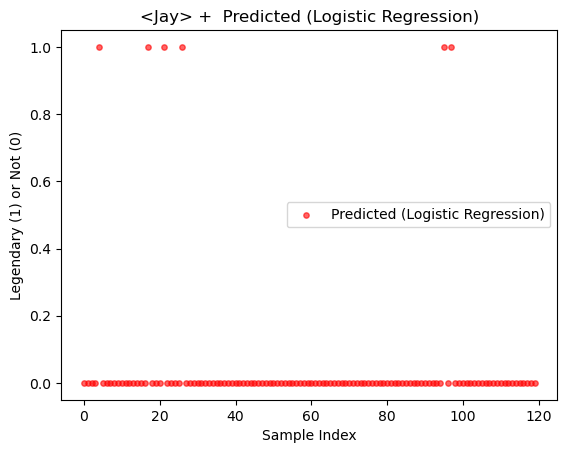

In [93]:

plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=15)
plt.title("<Jay> +  Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

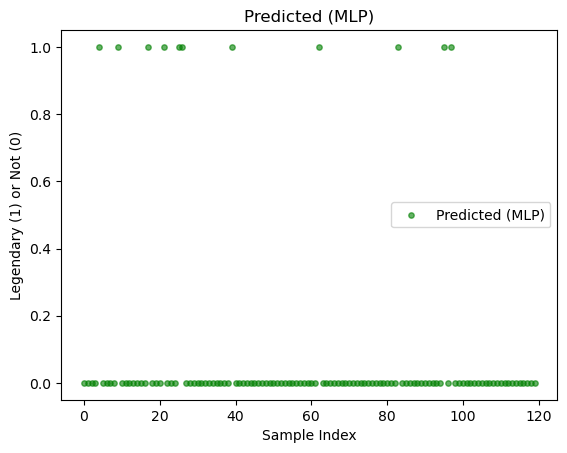

In [95]:
plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=15)
plt.title("Predicted (MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()

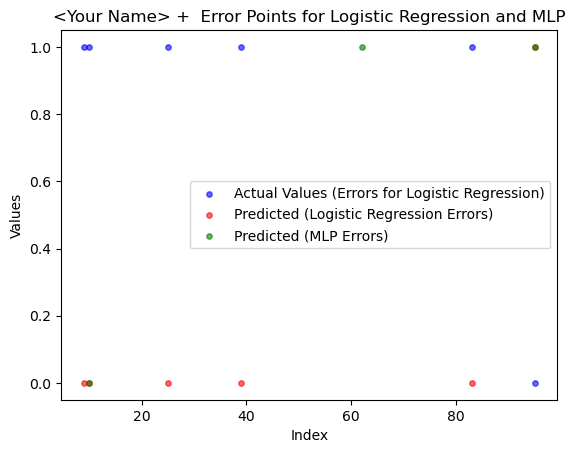

In [97]:
import matplotlib.pyplot as plt

# Identify error indices for Logistic Regression
errors_logistic = (y_val != y_val_pred_logistic)

# Identify error indices for MLP
errors_mlp = (y_val != y_val_pred_mlp)

# Plot the actual values at error indices
plt.scatter(
    np.where(errors_logistic)[0],  # Indices of errors for Logistic Regression
    y_val[errors_logistic],  # Actual values where Logistic Regression fails
    color='blue', alpha=0.6, label="Actual Values (Errors for Logistic Regression)", s=15
)

# # Plot the Logistic Regression predictions at error indices
plt.scatter(
    np.where(errors_logistic)[0],  # Indices of errors for Logistic Regression
    y_val_pred_logistic[errors_logistic],  # Predicted values where errors occur
    color='red', alpha=0.6, label="Predicted (Logistic Regression Errors)", s=15
)

# # Plot the MLP predictions at error indices
plt.scatter(
    np.where(errors_mlp)[0],  # Indices of errors for MLP
    y_val_pred_mlp[errors_mlp],  # Predicted values where errors occur
    color='green', alpha=0.6, label="Predicted (MLP Errors)", s=15
)

# Add plot details
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("<Your Name> +  Error Points for Logistic Regression and MLP")
plt.legend()
plt.show()


### Confusion Matrices

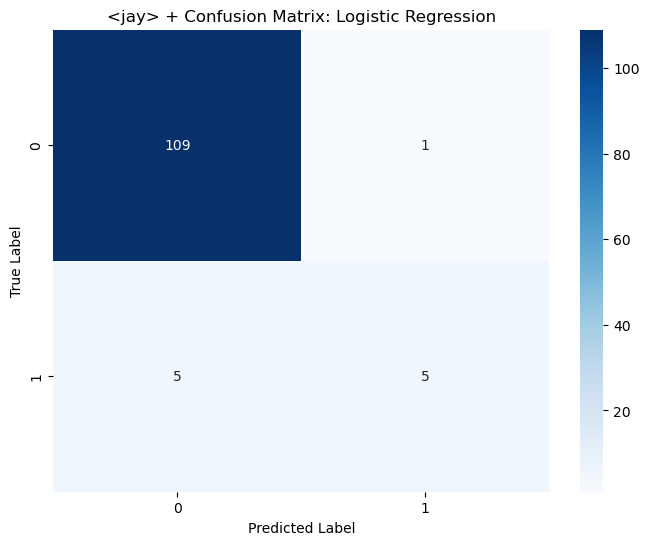

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("<jay> + Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

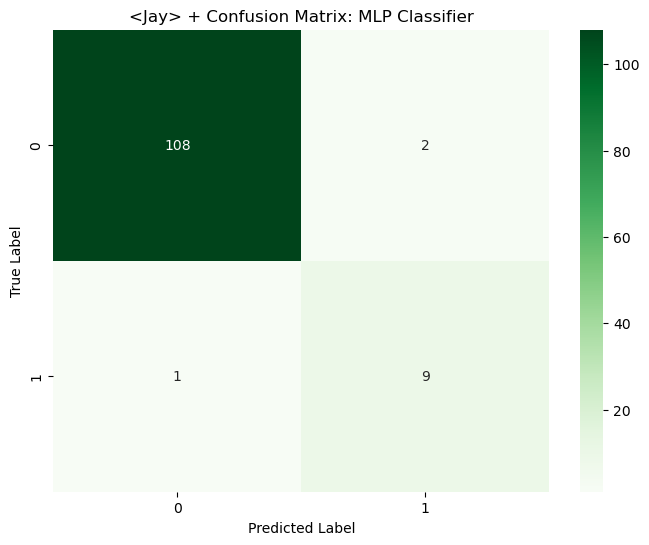

In [106]:
# MLP
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("<Jay> + Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()